# Библиотеки

In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

from Module.showInferensModel import load_labels, plot_image_with_boxes

# Константы

In [2]:
PATH_BEST = '../Weightts/best_100.pt'
PATH_TEST_IMAGES = './DataSet/MyData/Test/images'
PATH_TEST_LABELS = './DataSet/MyData/Test/labels'
SAVE_RESULT = './Result/'
NAME = '1'

In [3]:
model = YOLO(PATH_BEST)

# Тест


In [4]:
# results = model(PATH_TEST_IMAGES)
# results.save(SAVE_RESULT)

# На фотографии

In [5]:
NAME = '42'
results = model(f'{PATH_TEST_IMAGES}/{NAME}.jpg')  # Замените на путь к вашему изображению

# # Визуализация и сохранение результата
# for result in results:
#     result.show()  # Отобразить изображение с детекцией
#     result.save(SAVE_RESULT)  # Сохранить результат


image 1/1 d:\Nsu\SearchPersonAI\AI\DataSet\MyData\Test\images\42.jpg: 480x640 2 persons, 58.6ms
Speed: 5.6ms preprocess, 58.6ms inference, 158.7ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 d:\Nsu\SearchPersonAI\AI\DataSet\MyData\Test\images\130.jpg: 480x640 4 persons, 47.0ms
Speed: 5.0ms preprocess, 47.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


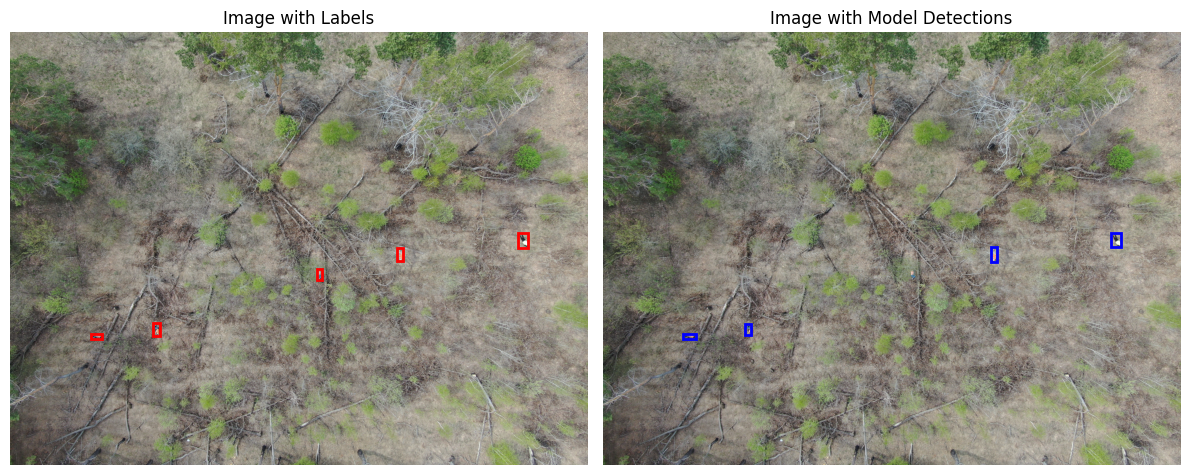

In [10]:
NAME = '130'
results = model(f'{PATH_TEST_IMAGES}/{NAME}.jpg')  # Замените на путь к вашему изображению
img = Image.open(f'{PATH_TEST_IMAGES}/{NAME}.jpg')
labels = load_labels(f'{PATH_TEST_LABELS}/{NAME}.txt')

# Создаем подграфики для отображения
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Отображаем исходное изображение с метками
plot_image_with_boxes(img, labels, axes[0], 'Image with Labels')

# Отображаем изображение с результатами модели
boxes_model = results[0].boxes.xyxy  # Доступ к результатам первого изображения
for box in boxes_model:
    x1, y1, x2, y2 = box.tolist()
    axes[1].add_patch(plt.Rectangle(
        (x1, y1), x2 - x1, y2 - y1,
        fill=False, edgecolor='blue', linewidth=2
    ))

axes[1].imshow(img)
axes[1].set_title('Image with Model Detections')

# Убираем оси и показываем изображения
for ax in axes:
    ax.axis('off')

plt.tight_layout()  # Чтобы картинки не накладывались друг на друга
plt.show()

# На видео

In [ ]:
# results = model('path/to/video.mp4')
# results.show()
# results.save(SAVE_RESULT)

# Простомтр результата

In [ ]:
# for result in results:
#     print(result.boxes.xyxy)   # Координаты
#     print(result.boxes.cls)    # Классы
#     print(result.boxes.conf)   # Уверенность